In [5]:
#1)
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
df = pd.DataFrame(iris.data)
df["y"] = iris.target

# Discretize numeric values into 3 bins
for i in range(4):
    df[i] = pd.cut(df[i], 3, labels=["low", "med", "high"])

# Initialize S as the first positive example
S = list(df[df.y == 0].iloc[0, :4])

for _, r in df[df.y == 0].iterrows():
    for i in range(4):
        if S[i] != r[i]:
            S[i] = "?"

print("Final S:", S)


Final S: ['?', '?', 'low', 'low']


In [4]:
#2)
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
df = pd.DataFrame(iris.data)
df["y"] = iris.target

for i in range(4):
    df[i] = pd.cut(df[i], 3, labels=["low", "med", "high"])

S = ['0'] * 4
G = [['?'] * 4]

for _, r in df.iterrows():
    if r["y"] == 0:
        for i in range(4):
            if S[i] == '0':Untitled3
                S[i] = r[i]
            elif S[i] != r[i]:
                S[i] = "?"

print("Most Specific Hypothesis S:", S)
print("Most General Hypothesis G:", G[0])


Most Specific Hypothesis S: ['?', '?', 'low', 'low']
Most General Hypothesis G: ['?', '?', '?', '?']


Confusion Matrix:
 [[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]
Accuracy: 95.56 %


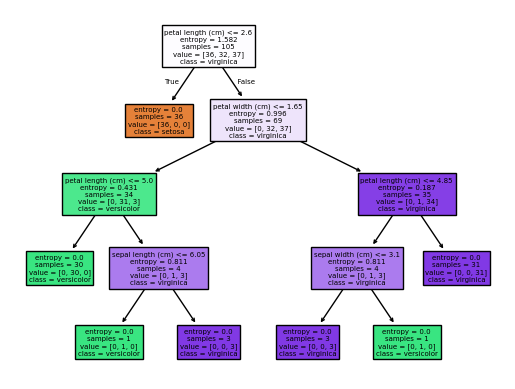

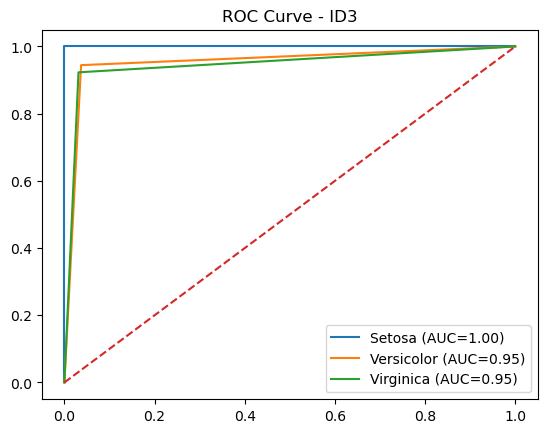

In [3]:
#3)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

iris = datasets.load_iris()
Xtr, Xte, ytr, yte = train_test_split(iris.data, iris.target, test_size=0.3, random_state=1)

model = DecisionTreeClassifier(criterion="entropy").fit(Xtr, ytr)
yp = model.predict(Xte)

print("Confusion Matrix:\n", confusion_matrix(yte, yp))
print("Accuracy:", round(accuracy_score(yte, yp) * 100, 2), "%")

plot_tree(model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

# ROC curves
yb = label_binarize(yte, classes=[0, 1, 2])
proba = model.predict_proba(Xte)

for i, name in enumerate(["Setosa", "Versicolor", "Virginica"]):
    f, t, _ = roc_curve(yb[:, i], proba[:, i])
    plt.plot(f, t, label=f"{name} (AUC={auc(f, t):.2f})")

plt.plot([0, 1], [0, 1], '--')
plt.legend()
plt.title("ROC Curve - ID3")
plt.show()


In [11]:
#4)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Load dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Split into train/test
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3, random_state=1)

# Scale features (important for neural networks!)
scaler = StandardScaler()
Xtr = scaler.fit_transform(Xtr)
Xte = scaler.transform(Xte)

# Define and train the model
model = MLPClassifier(
    hidden_layer_sizes=(6,),   # one hidden layer with 6 neurons
    activation='relu',         # ReLU activation
    solver='adam',             # Adam optimizer
    max_iter=2000,             # allow more iterations
    early_stopping=True,       # stop if validation score stops improving
    random_state=1
)

model.fit(Xtr, ytr)

# Predictions
yp = model.predict(Xte)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(yte, yp))
print("Accuracy:", round(accuracy_score(yte, yp) * 100, 2), "%")


Confusion Matrix:
 [[ 0 13  1]
 [ 0 16  2]
 [ 0 13  0]]
Accuracy: 35.56 %


In [7]:
#5)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3, random_state=1)

model = GaussianNB().fit(Xtr, ytr)
yp = model.predict(Xte)

print("Accuracy:", accuracy_score(yte, yp))
print("Predictions:", yp)


Accuracy: 0.9333333333333333
Predictions: [0 1 1 0 2 2 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1]


In [27]:
#6)
import logging
logging.getLogger("pgmpy").setLevel(logging.CRITICAL)

from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target

# discretize
for c in iris.feature_names:
    df[c] = pd.cut(df[c], 3, labels=["low","med","high"])

model = DiscreteBayesianNetwork([
    ("sepal length (cm)", "target"),
    ("sepal width (cm)", "target"),
    ("petal length (cm)", "target"),
    ("petal width (cm)", "target")
])
model.fit(df, estimator=MaximumLikelihoodEstimator)

infer = VariableElimination(model)

# pick any 5 random rows (not first 5)
rows = np.random.choice(len(df), 5, replace=False)
test = df.iloc[rows].drop("target", axis=1)

preds = [infer.map_query(["target"], evidence=test.iloc[i].to_dict())["target"] for i in range(5)]

print("Predictions:", preds)
print("Rows used:", rows.tolist())


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Predictions: [np.int64(1), np.int64(0), np.int64(0), np.int64(2), np.int64(2)]
Rows used: [69, 21, 9, 130, 131]


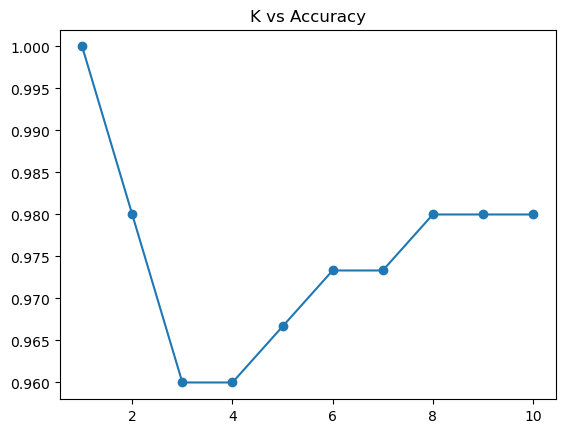

Correct: [(np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(

In [9]:
#7)
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X, y = iris.data, iris.target

acc = []
for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k).fit(X, y)
    acc.append(model.score(X, y))

plt.plot(range(1, 11), acc, marker='o')
plt.title("K vs Accuracy")
plt.show()

best_k = acc.index(max(acc)) + 1
model = KNeighborsClassifier(n_neighbors=best_k).fit(X, y)
yp = model.predict(X)

print("Correct:", [(y[i], yp[i]) for i in range(len(y)) if y[i] == yp[i]])
print("Wrong:", [(y[i], yp[i]) for i in range(len(y)) if y[i] != yp[i]])


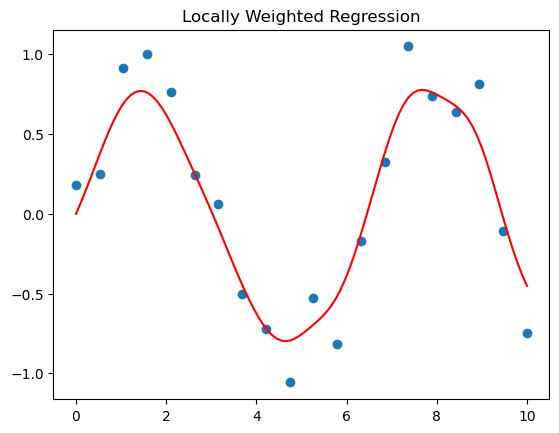

In [10]:
#8)
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0, 10, 20)
y = np.sin(X) + np.random.randn(20) * 0.2
X = X.reshape(-1, 1)

def lwr(x, X, y, tau=0.5):
    w = np.exp(-((X - x) ** 2) / (2 * tau * tau))
    W = np.diag(w.flatten())
    theta = np.linalg.pinv(X.T @ W @ X) @ (X.T @ W @ y)
    return theta * x

xt = np.linspace(0, 10, 100).reshape(-1, 1)
yp = [lwr(i, X, y) for i in xt]

plt.scatter(X, y)
plt.plot(xt, yp, 'r')
plt.title("Locally Weighted Regression")
plt.show()
